In [29]:
import pandas as pd
import numpy as py
import seaborn as sn

from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

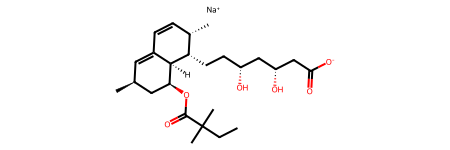

In [32]:
Simvastatin_Impurity_A = AllChem.MolFromSmiles('[H][C@@]1([C@H]([C@H](C=C2)C)CC[C@@H](O)C[C@H](CC([O-])=O)O)C2=C[C@@H](C[C@@H]1OC(C(C)(CC)C)=O)C.[Na+]')
Simvastatin_Impurity_A

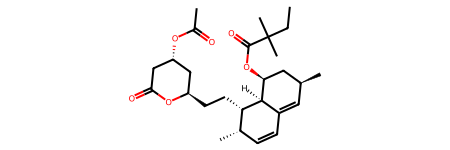

In [33]:
Simvastatin_Impurity_B = AllChem.MolFromSmiles('[H][C@@]1([C@H]([C@H](C=C2)C)CC[C@@H]3C[C@H](CC(O3)=O)OC(C)=O)C2=C[C@@H](C[C@@H]1OC(C(C)(CC)C)=O)C')
Simvastatin_Impurity_B

In [34]:
bit_Imp_A = {}
bit_Imp_B = {}

Simvastatin_Impurity_A_mfp = AllChem.GetMorganFingerprintAsBitVect(Simvastatin_Impurity_A, 2, nBits=2048, bitInfo=bit_Imp_A) 
Simvastatin_Impurity_B_mfp = AllChem.GetMorganFingerprintAsBitVect(Simvastatin_Impurity_A, 2, nBits=2048, bitInfo=bit_Imp_B) 

In [35]:
print("Simvastatin Impurity A:", sorted(set(Simvastatin_Impurity_A_mfp.GetOnBits())))

print("Simvastatin Impurity B:", sorted(set(Simvastatin_Impurity_B_mfp.GetOnBits())))

Simvastatin Impurity A: [1, 5, 47, 70, 80, 87, 114, 227, 292, 294, 295, 392, 412, 446, 547, 629, 650, 653, 677, 680, 695, 697, 715, 722, 739, 766, 785, 798, 807, 832, 918, 924, 926, 973, 1004, 1019, 1057, 1058, 1081, 1083, 1126, 1213, 1226, 1231, 1290, 1292, 1309, 1380, 1457, 1575, 1621, 1873, 1885, 1916, 1917, 1999, 2017, 2038, 2039]
Simvastatin Impurity B: [1, 5, 47, 70, 80, 87, 114, 227, 292, 294, 295, 392, 412, 446, 547, 629, 650, 653, 677, 680, 695, 697, 715, 722, 739, 766, 785, 798, 807, 832, 918, 924, 926, 973, 1004, 1019, 1057, 1058, 1081, 1083, 1126, 1213, 1226, 1231, 1290, 1292, 1309, 1380, 1457, 1575, 1621, 1873, 1885, 1916, 1917, 1999, 2017, 2038, 2039]


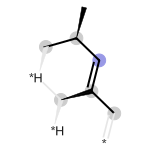

In [36]:
Draw.DrawMorganBit(Simvastatin_Impurity_A, 924, bit_Imp_A)

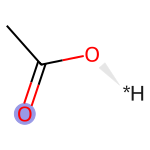

In [37]:
Draw.DrawMorganBit(Simvastatin_Impurity_B, 924, bit_Imp_B)

In [38]:
Intersection = set(Simvastatin_Impurity_A_mfp.GetOnBits()) & set(Simvastatin_Impurity_B_mfp.GetOnBits())
print("Intersection:", Intersection)
print("No. of Bits:", len(Intersection))

Intersection: {1, 5, 392, 650, 1290, 1292, 653, 785, 918, 924, 412, 926, 1309, 798, 1057, 1058, 547, 292, 677, 294, 295, 680, 807, 1575, 47, 1457, 695, 697, 1081, 1083, 1213, 446, 832, 70, 1226, 715, 973, 1231, 80, 1873, 722, 1999, 1621, 87, 1885, 2017, 227, 739, 1380, 1126, 1004, 114, 629, 2038, 2039, 1019, 1916, 1917, 766}
No. of Bits: 59


In [39]:
Union = set(Simvastatin_Impurity_A_mfp.GetOnBits()) | set(Simvastatin_Impurity_B_mfp.GetOnBits())
print("Union:", Union)
print("No. of Bits:", len(Union))

Union: {1, 5, 1290, 1292, 785, 1309, 798, 1057, 1058, 547, 292, 294, 295, 807, 1575, 47, 1081, 1083, 832, 70, 80, 1873, 1621, 87, 1885, 1380, 1126, 114, 629, 1916, 1917, 392, 650, 653, 918, 412, 924, 926, 677, 680, 1457, 695, 697, 1213, 446, 1226, 715, 973, 1231, 1999, 722, 2017, 227, 739, 1004, 2038, 2039, 1019, 766}
No. of Bits: 59


In [40]:
print("Tanimoto coefficient:", len(Intersection)/len(Union))

Tanimoto coefficient: 1.0


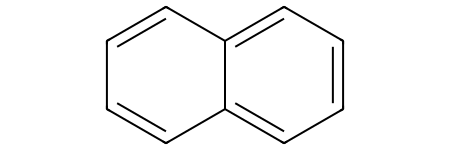

In [62]:
Naphthalene = AllChem.MolFromSmiles('c1c2ccccc2ccc1')
Naphthalene

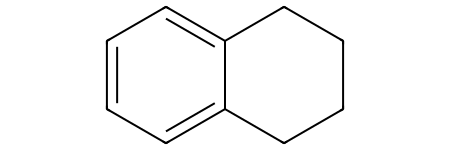

In [101]:
Tetralin = AllChem.MolFromSmiles('c1ccc2c(c1)CCCC2')
Tetralin

In [102]:
bit_naph = {}
bit_tetr = {}

Naphthalene_mfp = AllChem.GetMorganFingerprintAsBitVect(Naphthalene, 2, nBits=2048, bitInfo=bit_naph) 
Tetralin_mfp = AllChem.GetMorganFingerprintAsBitVect(Tetralin, 2, nBits=2048, bitInfo=bit_tetr) 

In [103]:
print("Naphthalene:   ", sorted(set(Naphthalene_mfp.GetOnBits())))
print("Tetralin:      ", sorted(set(Tetralin_mfp.GetOnBits())))

Naphthalene:    [598, 1087, 1088, 1199, 1380, 1750, 1855, 1873]
Tetralin:       [242, 310, 556, 926, 1028, 1088, 1199, 1236, 1380, 1708, 1738, 1750, 1873]


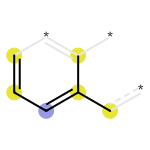

In [104]:
Draw.DrawMorganBit(Naphthalene, 1087, bit_naph)

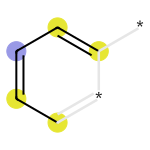

In [105]:
Draw.DrawMorganBit(Tetralin, 1199, bit_tetr)

In [107]:
Intersection = set(Naphthalene_mfp.GetOnBits()) & set(Tetralin_mfp.GetOnBits())
print("Intersection:", Intersection)
print("No. of Bits in Intersection:", len(Intersection))

Intersection: {1088, 1380, 1199, 1873, 1750}
No. of Bits in Intersection: 5


In [108]:
print("Union:", Union)
print("No. of Bits in Union:", len(Union))

Union: {1, 5, 1290, 1292, 785, 1309, 798, 1057, 1058, 547, 292, 294, 295, 807, 1575, 47, 1081, 1083, 832, 70, 80, 1873, 1621, 87, 1885, 1380, 1126, 114, 629, 1916, 1917, 392, 650, 653, 918, 412, 924, 926, 677, 680, 1457, 695, 697, 1213, 446, 1226, 715, 973, 1231, 1999, 722, 2017, 227, 739, 1004, 2038, 2039, 1019, 766}
No. of Bits in Union: 59


In [109]:
print("Tanimoto coefficient:", len(Intersection)/len(Union))

Tanimoto coefficient: 0.0847457627118644
